In [2]:
import pandas  as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import mlflow 
import mlflow.sklearn

## Data Collection and Exploration

In [3]:
df = pd.read_csv(r"Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [4]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Cleaning

In [6]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check for outliers
df.skew()

C:\Users\anshu\AppData\Local\Temp\ipykernel_21348\3256115495.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [9]:
# drop unwanted columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.shape

(10000, 11)

## Feature Selection

### ANOVA
- to assess whether the distribution of a numeric attribute is similar across groups or not (exited and not exited)

NUll Hypothesis: distribution of numeric attribute across two groups is similar
consider CI = 95%, significance level, alpha = 5% = 0.05

- if pvalue>alpha = we fail to reject null hypothesis = feature is not informative
- if pvalue<alpha = we successfully reject null hypothesis = feature is informative


In [11]:
# ANOVA 
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
xnum = df[nums]
y = df['Exited']

from sklearn.feature_selection import f_classif
fscore,pvalue = f_classif(xnum,y)

for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


### Chi Square test
- to assess whether the distribution of a categoric attribute is similar across groups or not (exited and not exited)

NUll Hypothesis: distribution of categoric attribute across two groups is similar
consider CI = 95%, significance level, alpha = 5% = 0.05

- if pvalue>alpha = we fail to reject null hypothesis = feature is not informative
- if pvalue<alpha = we successfully reject null hypothesis = feature is informative


In [12]:
cats = [ 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xcat = df[cats]
y = df['Exited']
from sklearn.preprocessing import LabelEncoder
xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])

from sklearn.feature_selection import chi2
cscore,pvalue = chi2(xcat,y)
for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


C:\Users\anshu\AppData\Local\Temp\ipykernel_21348\1466486295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
C:\Users\anshu\AppData\Local\Temp\ipykernel_21348\1466486295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])


In [13]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']]
y =df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=5)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 7) (8000, 7) (2000, 7)
(10000,) (8000,) (2000,)


### Preprocessing

In [15]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop="first"),[1,2]),],remainder='passthrough')
transformer.fit(xtrain)
xtrain = transformer.transform(xtrain)
xtest = transformer.transform(xtest)
print(xtrain.shape)

(8000, 8)


# Modelling

In [17]:
mlflow.set_experiment("churn_prediction")

<Experiment: artifact_location='file:///d:/AI/MLOps/EYMAY23/MLOps-with-Azure/mlruns/738194057631278017', creation_time=1683524677966, experiment_id='738194057631278017', last_update_time=1683524677966, lifecycle_stage='active', name='churn_prediction', tags={}>

### Manual Tracking

In [18]:
from sklearn import metrics

c:\ProgramData\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


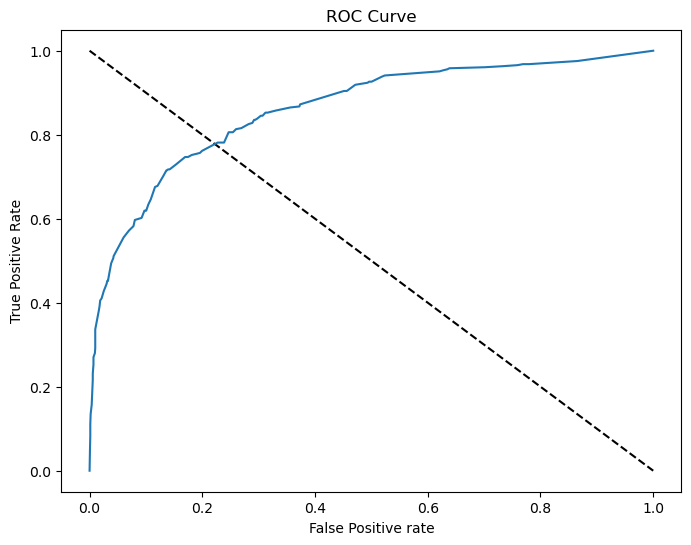

In [21]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run():
    # log params
    mlflow.log_param("max_depth",8)
    mlflow.log_param("min_samples_leaf",20)
    mlflow.log_param("criterion",'gini')
    model = DecisionTreeClassifier(criterion='gini',min_samples_leaf=20,max_depth=8,
                               class_weight='balanced',random_state=5)
    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    # log metrics
    mlflow.log_metric("accuracy",metrics.accuracy_score(ytest,ypred))
    mlflow.log_metric("F1 Score",metrics.f1_score(ytest,ypred))

    #log artifacts
    #mlflow.log_artifact("Bank_churn_modelling.csv","Churn_dataset_v1")

    # log artifacts
    # ROC Curve
    ypred_proba = model.predict_proba(xtest)
    fpr,tpr,thresh = metrics.roc_curve(ytest,ypred_proba[:,1])
    fig = plt.figure(figsize=(8,6))
    plt.plot([0,1],[1,0],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.savefig("ROC-Curve.png")
    mlflow.log_artifact("ROC-Curve.png")
    mlflow.sklearn.log_model(model,"churn_model")

    

In [19]:
from sklearn import metrics
print(metrics.classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.46      0.74      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.78      2000



In [20]:
mlflow.get_tracking_uri()

'file:///d:/AI/MLOps/EYMAY23/MLOps-with-Azure/mlruns'

In [21]:
!mlflow ui

'mlflow' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
from mlflow.models import make_metric

In [42]:
from sklearn.tree import DecisionTreeClassifier

mlflow.sklearn.autolog()
with mlflow.start_run(run_name="myAutoLogRun"):
    model = DecisionTreeClassifier(criterion='gini',min_samples_leaf=20,max_depth=8,
                               class_weight='balanced',random_state=5)
    model.fit(xtrain,ytrain)
 
    model_uri = mlflow.get_artifact_uri("model")
    print(model_uri)

    def custom_metric_1(evaldata):
        return 0.5

    # evaluate model
    evaldata = pd.DataFrame(xtest,columns=transformer.get_feature_names_out())
    evaldata['label'] = ytest.values.tolist()
    result = mlflow.evaluate(model=model_uri,data=evaldata,
                             targets="label",model_type='classifier',
                             evaluators=['default'],
                             custom_metrics=[make_metric(eval_fn = custom_metric_1,
                                                         greater_is_better=True),]
                             )
    
    

    

2023/05/08 12:44:30 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
2023/05/08 12:44:30 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.


file:///d:/AI/MLOps/EYMAY23/MLOps-with-Azure/mlruns/738194057631278017/45dc6fab744342a7bd5bf2290391f742/artifacts/model


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


TypeError: custom_metric_1() takes 1 positional argument but 2 were given

In [34]:
runid = mlflow.last_active_run()
runid.to_dictionary()['info']['run_uuid']

'96b76e47bf9546e7bebec7d63588ee4a'

In [37]:
with mlflow.start_run(run_id='96b76e47bf9546e7bebec7d63588ee4a') as run:
    model_uri = mlflow.get_artifact_uri("model")
    print(model_uri)

    # evaluate model
    evaldata = pd.DataFrame(xtest,columns=transformer.get_feature_names_out())
    evaldata['label'] = ytest.values.tolist()
    result = mlflow.evaluate(model=model_uri,data=evaldata,
                             targets="label",model_type='classifier',
                             evaluators=['default']
                             )

file:///d:/AI/MLOps/EYMAY23/MLOps-with-Azure/mlruns/738194057631278017/96b76e47bf9546e7bebec7d63588ee4a/artifacts/model


OSError: No such file or directory: 'D:\AI\MLOps\EYMAY23\MLOps-with-Azure\mlruns\738194057631278017\96b76e47bf9546e7bebec7d63588ee4a\artifacts\model'

In [28]:
evaldata

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 8.6350870e+04,
        2.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3225322e+05,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3235269e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00]])

In [ ]:
# how to change the key name in autolog (adding prefix - test for evaluation)